# Deckblatt: Versuch (B): Die Lebensdauer des Positroniums


Gruppennummer: 173 

Vorname: Hatem Nachname: Alnasri 

Vorname: Jasin Nachname: Mustafi

Datum: 06.11.2024

# Theoretische Grundlagen

## 1. Der Beta-Zerfall:
In diesem Versuch wird mit der Strahlung aus radioaktiven Zerfällen gearbeitet, insbesondere mit der $\gamma$ Strahlung und der $\beta ^+$ Strahlung, wobei bei letzerer Positronen emmitiert werden.

Beim $\beta ^+$ Zerfall wird die Kernladungszahl um eine Einheit von $Z$ zu $Z-1$ verringert. Das geschieht, indem ein Proton in ein Neutron, Positron und Neutrino umwandelt wird. $$p \to n + e^+ + \nu$$

Ein besonderes Beispiel hierfür ist der Zerfall von Natrium in seinen Tochterkern Neon, der für dieses Experiment wichtig ist. 

<img src="Natrium_zerfall.png" alt="Natrium Zerfall" width="300" />


(Quelle: www.uni-muenster.de/Physik.KP/AGWeinheimer/Files/theses/Diplom_Sebastian_Streubel.pdf)

Der $\beta_1 ^+$ Zerfall tritt in Verbindung mit dem $\gamma$ Zerfall, da der Übergang nicht zum Grundzustand, sondern zum angeregten Zustand des Tochterkerns führt. 

## 2. Das Positron:
Das Positron ist ein Elementarteilchen aus der Gruppe der Fermionen, es ist das Antiteilchen zum Elektron. Es hat die gleiche Masse und gleichen Spin, aber die entgegengesetzte Ladung. Neben dem $\beta$-Zerfall, können Positronen auch durch die sogenannte Paarbildung entstehen. Dabei zerfällt ein hochenergetisches $\gamma$-Quant in ein Elektron-Positron-Paar. Die minimale Energie, die das $\gamma$ Quant haben muss, entspricht der Ruheenergie beider Teilchen. Es gilt: $E_{\gamma, \text{min}} = 2 * E_0 = 2 * m_e * c^2$

<img src="paarbildung.png" alt="paarbildung" width="200" />

(Quelle: de.wikipedia.org)

## 3. Paarvernichtung: 
Bei der Paarvernichtung, vernichten sich ein Elektron und ein Positron unter der Entstehung eines oder mehrerer $\gamma$-Quanten. Die Vernichtung unter Erzeugung von einem $\gamma$-Quant ist nur in Materie möglich, da sonst die Energie- und Impulserhaltung nicht möglich ist. Dieser Einquantzerfall ist jedoch viel unwahrscheinlicher und wird an dieser Stelle vernachlässigt. 
Für eine vollständige Betrachtung, muss der Spin des Elektons und des Positrons mit einbezogen werden. Diese beiden Teilchen gehören zu der Gruppe der Fermionen und haben daher den Spin 1/2. Das Elektron-Positron-Paar kann (ohne Bahndrehimpuls) die beiden Zustände I = 0 oder I = 1 annehmen. Der I = 0 Zustand ist nur einfach entartet und wird daher als Singulett berzeichnet. Der I = 1 Zustand ist hingengen , dreifach entartet und heißt Triplett. Damit beim Zerfall auch die Erhaltung des Gesamtdrehimpuls gewährleitet wir, müssen die entstandenen $\gamma$ Quanten einen Drehimpuls mitführen. Photonen haben den Spin I = 1. Das heißt, dass der Singulett Zustand in zwei Quanten zerfällt und der Triplett Zustand in drei oder mehr.
Es git für das Verhältnis der beiden Zerfallsmöglichkeiten: 
$$\frac{\sigma_{3\gamma}}{\sigma_{2\gamma}} = \frac{\frac{3}{4} \cdot {}^3 \sigma_{3\gamma}}{\frac{1}{4} \cdot {}^1\sigma_{2\gamma}} = \frac{3}{8} \alpha = \frac{1}{372}$$
wobei $\alpha$ der Kopplungskonstanten der elektromagnetischen Wechselwirkung entspricht.

Daher ist auch der Triplettzerfall viel unwahrscheinlicher.
(Quelle: siehe Blaues Buch Seite 149)

## 4. Positronium: 

Neben der direkten Vernichtung, können das Elektron und das Positron einen Bindungszustand eingehen. Dabei entspricht diese Bindung dem Wasserstoffatom, bei der das Positron die Rolle des Atomkerns übernimmt. Auch hier gibt es den Singulettzustand, das Parapositronium, und den Triplettzustand, das Orthopositronium.
Bei ausreichender niedriger Energie kommt es häufiger zur Bildung eines Positroniums. Die Wahrscheinlichkeit für die Bildung von Positronium ist dabei deutlich höher als die Zerfallswahrscheinlichkeit freier Positronen.

In bestimmten Festkörpern kann es zur Bildung von Positronium kommen. Der wichtigste Unterschied zu Gasen ist, dass die langlebige Komponente deutlich schneller zerfällt als im Festkörper, wobei auch 2 statt 3 $\gamma$-Quanten emittiert werden. 
Beim sogenannten Pick-oﬀ-Prozess wird durch Austausch von Drehimpuls mit der Materie der sehr viel wahrscheinlichere Zweiquantenzerfall für den Tripplettzustand möglich. 
Außerdem kann durch einen Elektronenaustausch zwischen dem Positronium und der umgebenden Materie eine Umwandlung vom Para- in das Orthopositronium und umgekehrt möglich werden. Diesen Effekt nennt man die Konversion. Da
diese aber kleiner ist als die Zerfallswahrscheinlichkeit des Singulett- und größer als die des Triplettzustandes, wird durch die Konversion mehr Orthopositronium vernichtet als erzeugt.

Nach der Literatur haben die freie Zerstrahlung und der Zerfall
von Parapositronium  eine Zerfallszeit von $10^{−10}$ s, die des Zerfalls von Orthopositronium liegt im Bereich von $10^{−7}$ s. 
(Quelle: siehe Blaues Buch Seite 149)

In [7]:
# !pip install kafe2
# !pip install PhyPraKit
# !pip install uncertainties

import numpy as np
import kafe2 as ka 
import PhyPraKit as ppk
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy import constants as spc
from IPython.display import Markdown as md
from IPython.display import display
from uncertainties import unumpy
from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit
from PhyPraKit import convolutionPeakfinder
%matplotlib inline


## Der Versuchsaufbau:

<img src="versuchsaufbau.png" alt="versuchsaufbau" width="600" />

(Quelle: siehe blaues Buch Seite 147)


Die Quelle befindet sich zwischen zwei beweglichen Detektoren, die in einem Winkel von 180° zueinander angeordnet sind. Ein Detektor erfasst das Gamma-Quant der ${}^{22}$Na-Quelle, welches als Startsignal der Zeitmessung dient. Der andere Detektor kann verschoben werden, um Messungen in unterschiedlichen Abständen zu ermöglichen.

In [8]:
def improt_data(filepath):
    df = pd.read_csv(filepath_or_buffer= filepath, header=None, skipinitialspace=True)
    df = df[0].str.split(r'\s+', n=1, expand=True)
    values_array = df[1].astype(int).tolist()
    return np.array(values_array)

Als Quelle für die Positronen wird hier Natrium ${}^{22}\text{Na}$ verwendet. Wie oben bereits erklärt, Zerfällt ${}^{22}\text{Na}$ unter Erzeugung eines Positrons in ${}^{22}\text{Ne}$. Dieses wiederrum sendet mit einer sehr kurzen Lebensdauer ein $\gamma$-Quant mit einer Energie von 127.6 MeV. Das entstande Positron verliert durch Stöße im Festkörper schnell seine Energie nach dem $1/v$ Gesetz und bildet Positronium. Das alles passiert in einer sehr kleinen Zeitskala (Die Abbremsung liegt im bereich von $10^{-12} s$), so dass man die Detektion des $\gamma$-Quants als Startpunkt der Existenz des Positroniums nehmen kann. Beim Zerfall des Positroniums wiederrum werden $\gamma$-Quanten ausgesendet, die als Endzeitpunkt verwendet werden. 

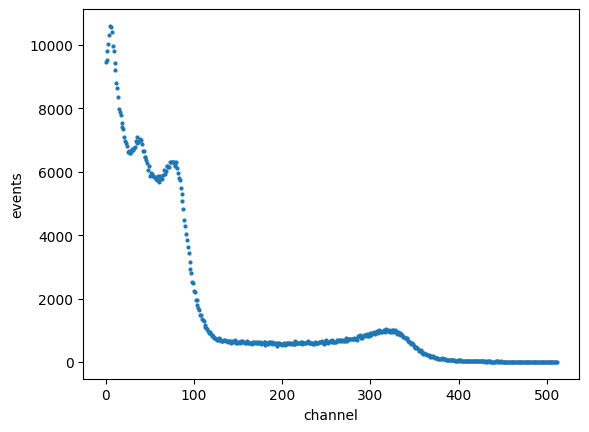

In [9]:
A1a = improt_data('Data/1a.RPT')
plt.plot(A1a, 'o', markersize=2)
plt.xlabel("channel")
plt.ylabel("events")
plt.show()

Hier ist man an das Spektrum von Teilchen ab einer bestimmten Energie interessiert. In diesem Fall ist es der Peak bei etwa einem channel von 300. Alle anderen Energien werden unterdrückt. 

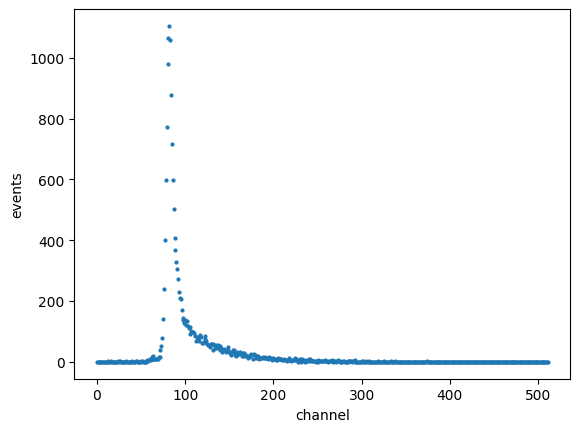

In [10]:
A1b = improt_data('Data/1b.RPT')
A1b = A1b[~np.isnan(A1b)]
plt.plot(A1b, 'o', markersize=2)
plt.xlabel("channel")
plt.ylabel("events")
plt.show()

Die Zeitachse muss zunächst kalibriert werden, und die Angaben des Kanals müssen in Zeiten umgerechnet werden. Dazu wir eine Verzögerung des Signals in 4 ns (von 0 ns bis 36 ns) Schritten eingestellt.

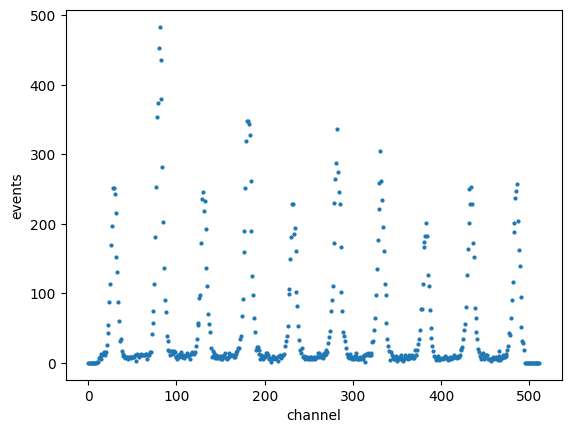

In [11]:
verzoegerungen = improt_data('Data/verzoegerungen.RPT')
plt.plot(verzoegerungen, 'o', markersize=2)
plt.xlabel("channel")
plt.ylabel("events")
plt.show()

Nun wird über die gemessenen Peaks jeweils einen Gauss-Fit gelegt, um den Mittelwert und die Unsicherheit zu bestimmen. Durch eine Auftragung der Zeitverschiebungen gegen der Verschiebungen auf der Kanal-Achse (die bestimmten Mittelwerte) kann so die Zeitachse kalibriert werden.
Es wird folgendes Modell verwendet: 
$$t = m \cdot x + c$$

In [12]:
def gaussian(x,s= 3,m= 30):
    return  1/np.sqrt(2*np.pi*s**2) * np.exp(-((x-m)**2)/(2*s**2))

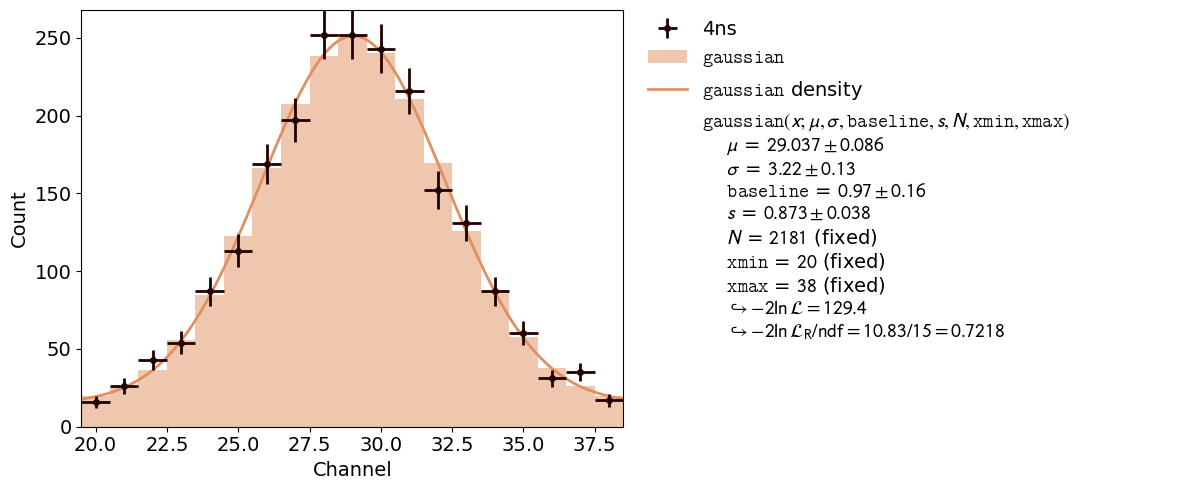

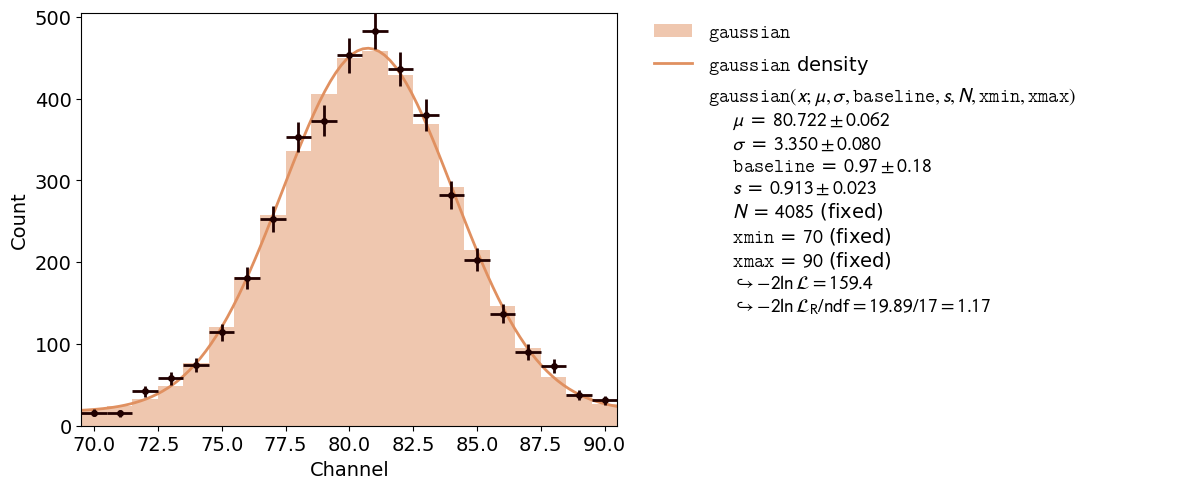

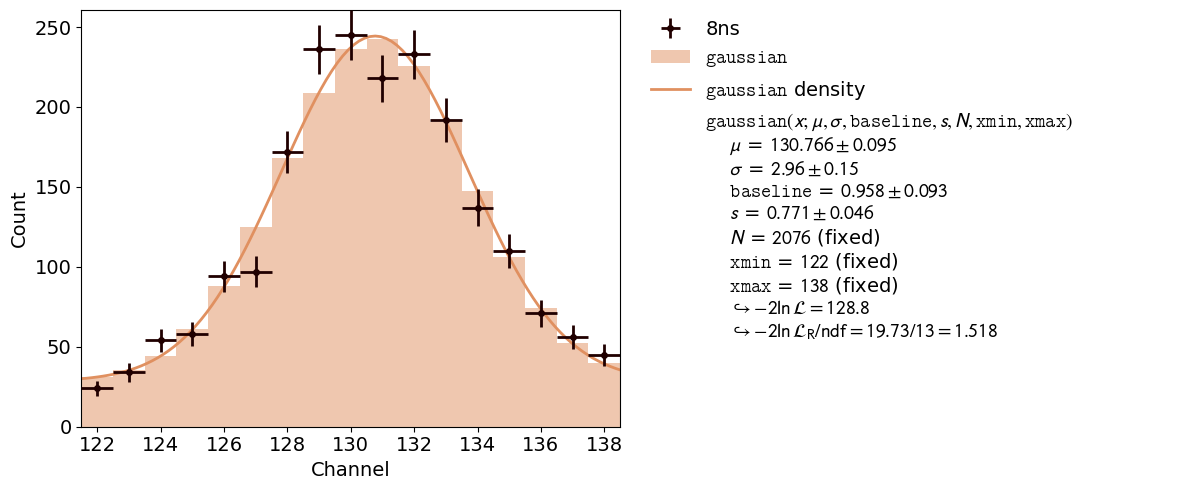

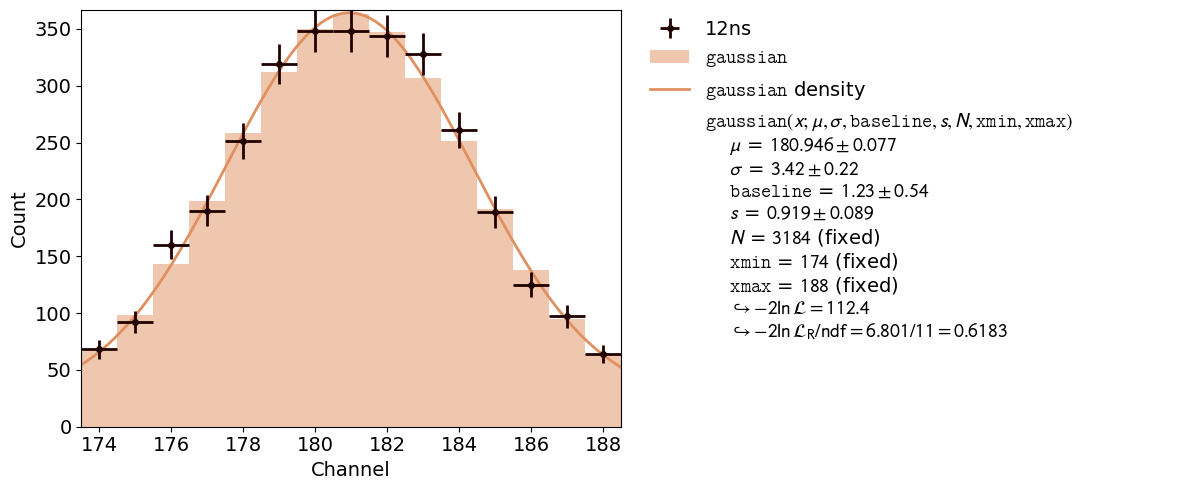

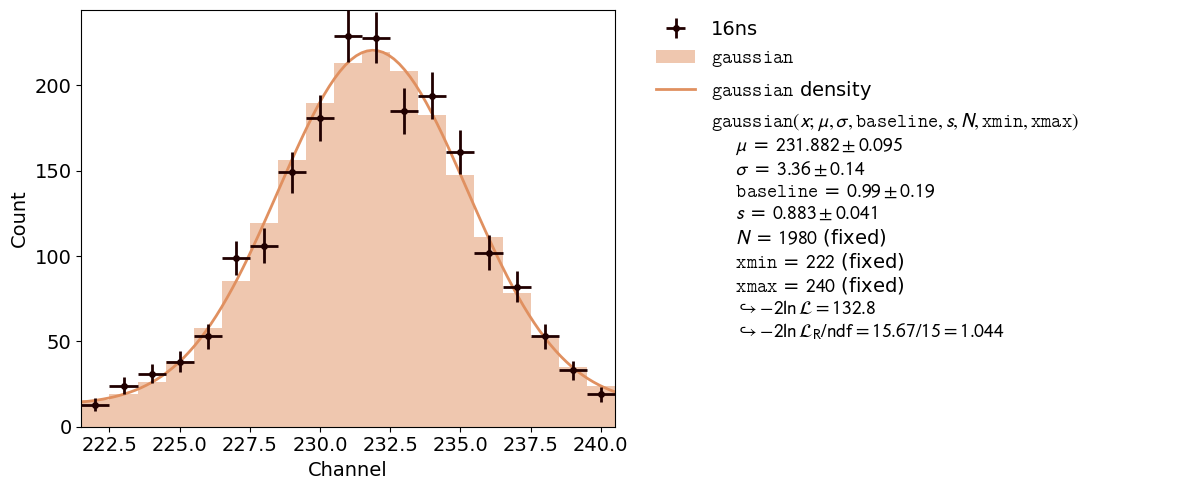

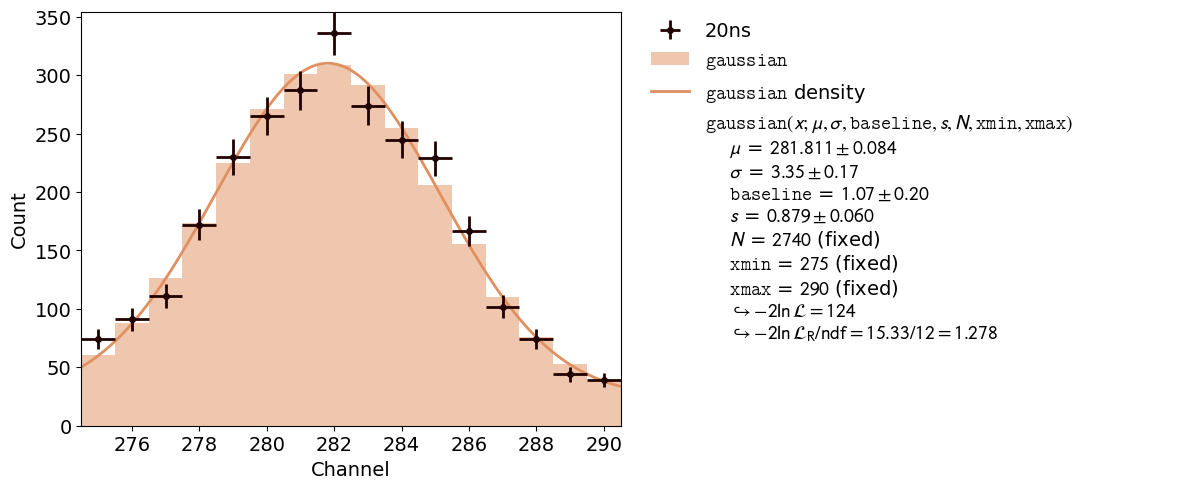

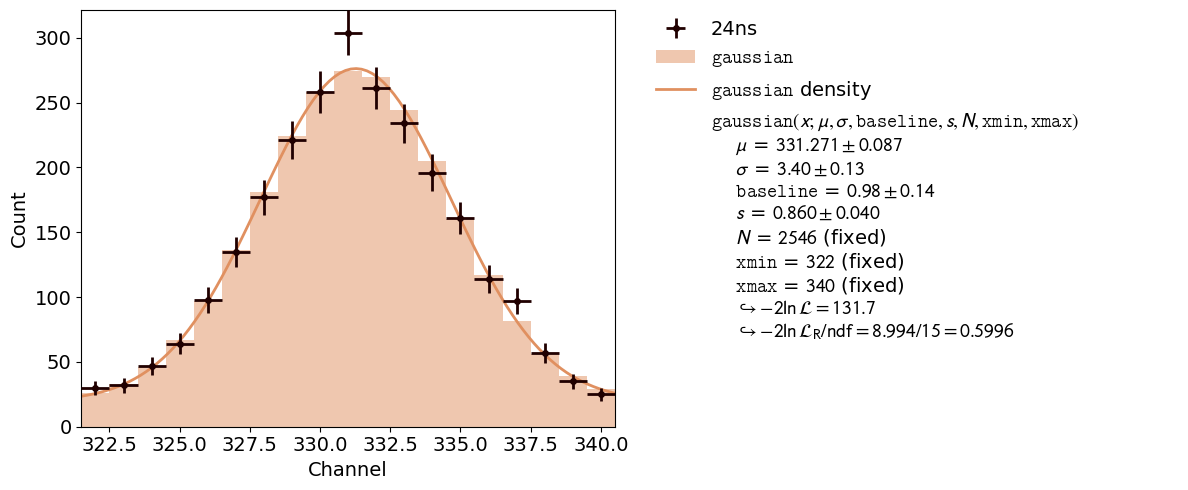

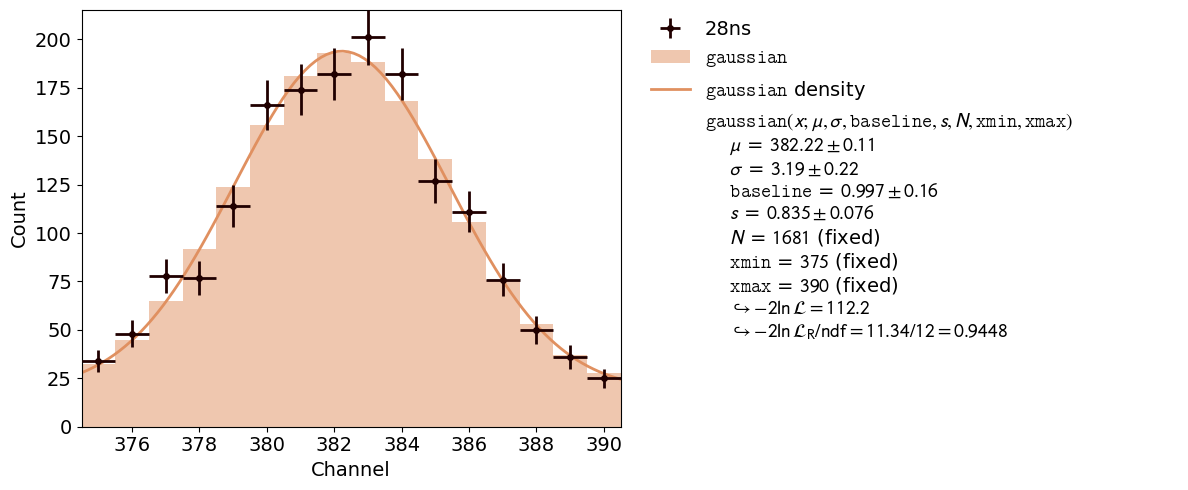

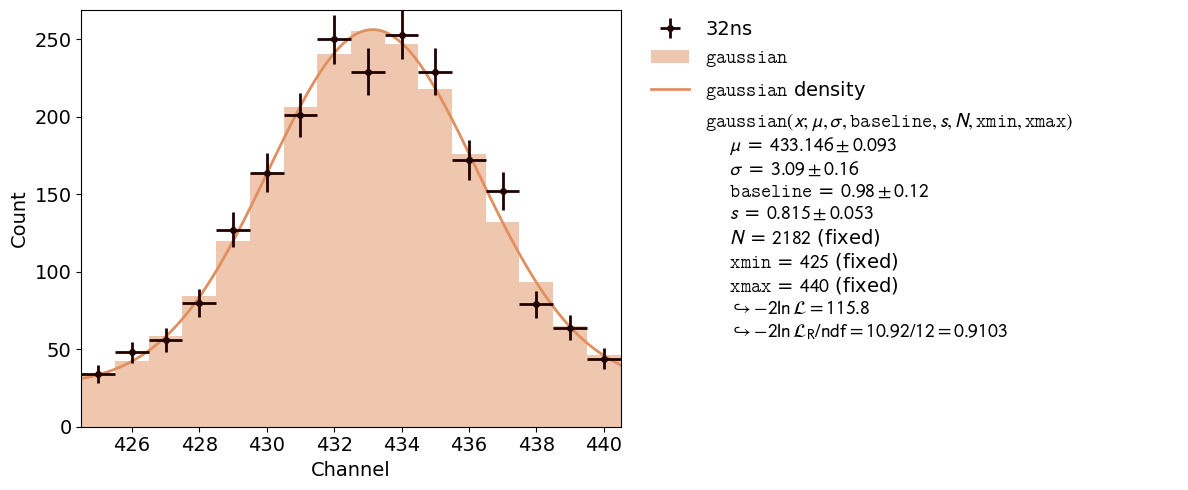

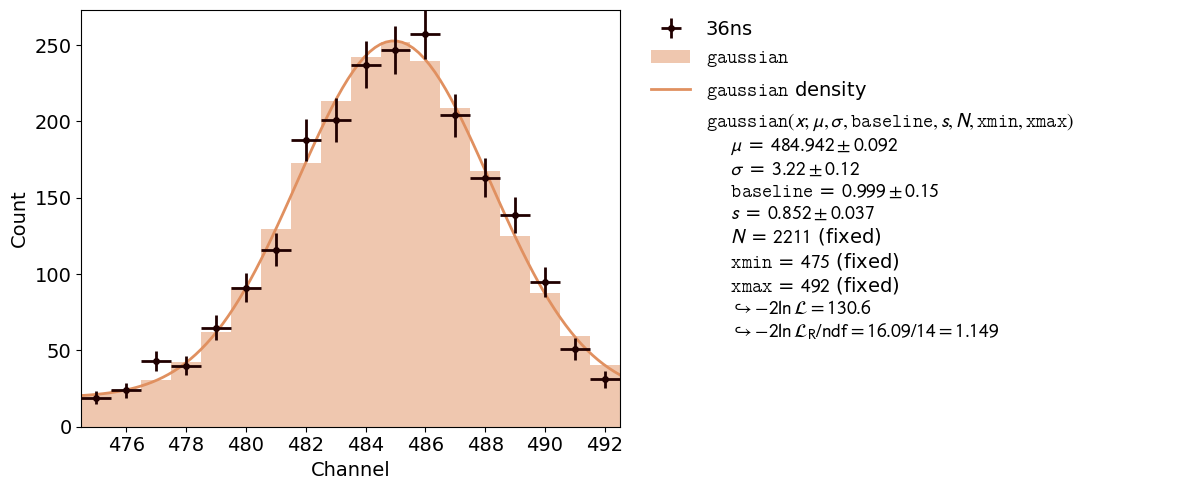

In [13]:
from gamma_tools import fit_peak, hist_fit_data
fit_1 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 20, 38, "4ns")
fit_2 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 70, 90, "")
fit_3 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 122, 138, "8ns")
fit_4 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 174, 188, "12ns")
fit_5 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 222, 240, "16ns")
fit_6 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 275, 290, "20ns")
fit_7 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 322, 340, "24ns")
fit_8 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 375, 390, "28ns")
fit_9 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 425, 440, "32ns")
fit_10 = fit_peak(np.arange(len(verzoegerungen)), verzoegerungen, 475, 492, "36ns")

In [14]:
datas = [
fit_1.get_result_dict(),
fit_2.get_result_dict(),
fit_3.get_result_dict(),
fit_4.get_result_dict(),
fit_5.get_result_dict(),
fit_6.get_result_dict(),
fit_7.get_result_dict(),
fit_8.get_result_dict(),
fit_9.get_result_dict(),
fit_10.get_result_dict(),
]
mu = []
mu_err = []
sigma = []
sigma_err = []
for i in datas:
    mu.append(i["parameter_values"]['mu'])
    sigma.append(i["parameter_values"]["sigma"])
    mu_err.append(i["parameter_errors"]["mu"])
    sigma_err.append(i["parameter_errors"]["sigma"])

sigma_and_err =  unumpy.uarray(sigma, sigma_err) 
fwhm = 2 * np.sqrt(2*np.log(2)) * sigma_and_err
mu_and_err = unumpy.uarray(mu,np.asarray(mu_err)) 

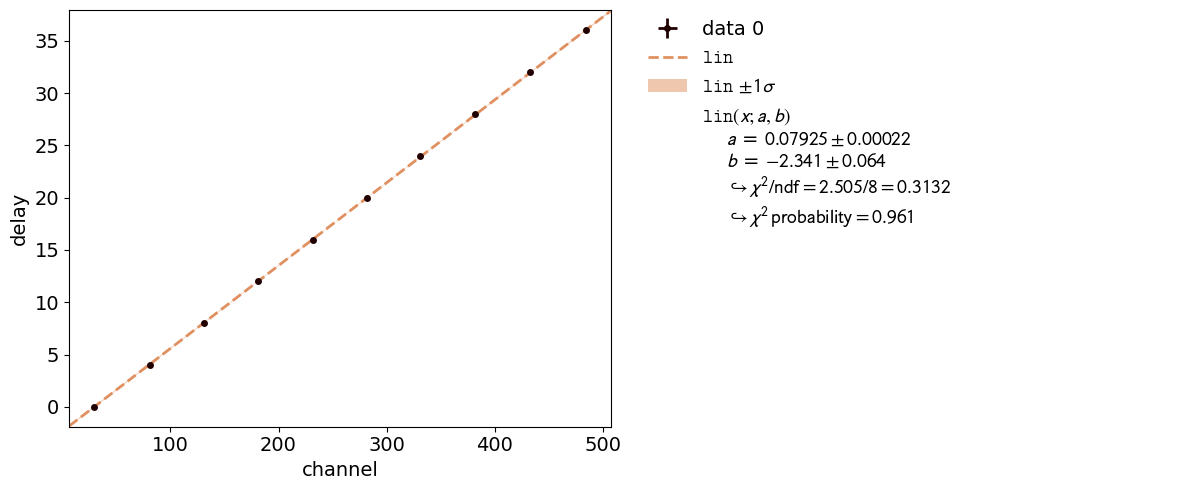

In [15]:
def lin(x, a, b):
    return a * x + b

delay = np.arange(0, 40, 4)

fit = ka.XYFit(xy_data= [unumpy.nominal_values(mu_and_err), delay], model_function= lin)
plot = ka.Plot(fit)
plot.x_label = "channel"
plot.y_label = "delay"

fit.add_error('x' , unumpy.std_devs(mu_and_err))
fit.add_error('y', 0.1)

fit.do_fit()
plot.plot()
plt.show()

data_fit = fit.get_result_dict()
steigung = unumpy.uarray(data_fit["parameter_values"]['a'], data_fit["parameter_errors"]["a"])
offset = unumpy.uarray(data_fit["parameter_values"]['b'], data_fit["parameter_errors"]["b"])

Da keine Unsicherheit auf die Verzogerung gegeben sind, wird hier eine Unsicherheit von 10 % angenomen. Auf dem Fit können dann folgende Werte entnommen werden. 
$$t = (0.0792\pm0.0002) \, ns \cdot x + (-2.3406\pm0.0644) \, ns$$

Damit werden nun alle daten kalibriert.

In [16]:
# zeitauflösung 

zeitauflösung = fwhm * steigung
zeitauflösung_mean = (np.mean(unumpy.nominal_values(zeitauflösung)), np.mean(unumpy.std_devs(zeitauflösung)))
np.mean(zeitauflösung)

0.6073126538884555+/-0.009494030388686297

In [17]:
start = 82
end = 320
zeiten = (steigung * np.arange(len(A1b)) + offset)[start:end]
zeiten = zeiten - zeiten[0]

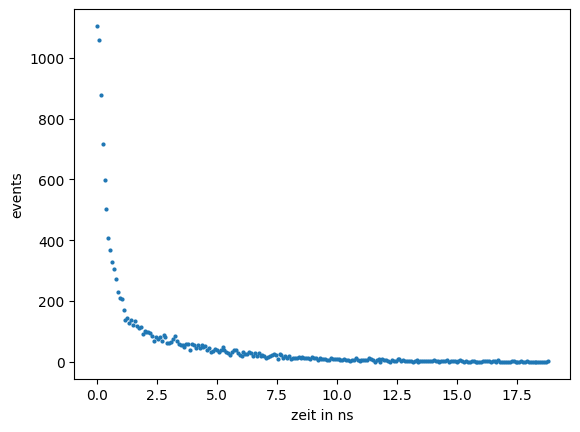

In [18]:
plt.plot(unumpy.nominal_values(zeiten), A1b[start:end], 'o', markersize=2)
plt.xlabel("zeit in ns")
plt.ylabel("events")
plt.show()


Nun werden die mittleren Lebensdauern der verschiedenen Positronium-Zustände bestimmt. Aufgrund der begrenzten Zeitauflösung ist es jedoch nicht möglich, zwischen den beiden kurzlebigen Zuständen des Para-Positroniums und der Annihilation freier Elektron-Positron-Paare im Acrylglas zu unterscheiden.
Wir erhalten eine Zeitauflösung von $\delta t = 0.6073\pm0.0095 ns$

Das Spektrum hat daher die Form:

$$N(t) = A e^{-\frac{t}{\tau_1}} + B e^{-\frac{t}{\tau_2}} + C$$

wobei A, B und C Konstanten sind und die $\tau_1 , \tau_2$ die mittleren Lebensdauern des lang- und allgemein kurzlebigen Positroniums darstellen. Mit geeigneten Fit-Verfahren können die Lebensdauern bestimmt werden.


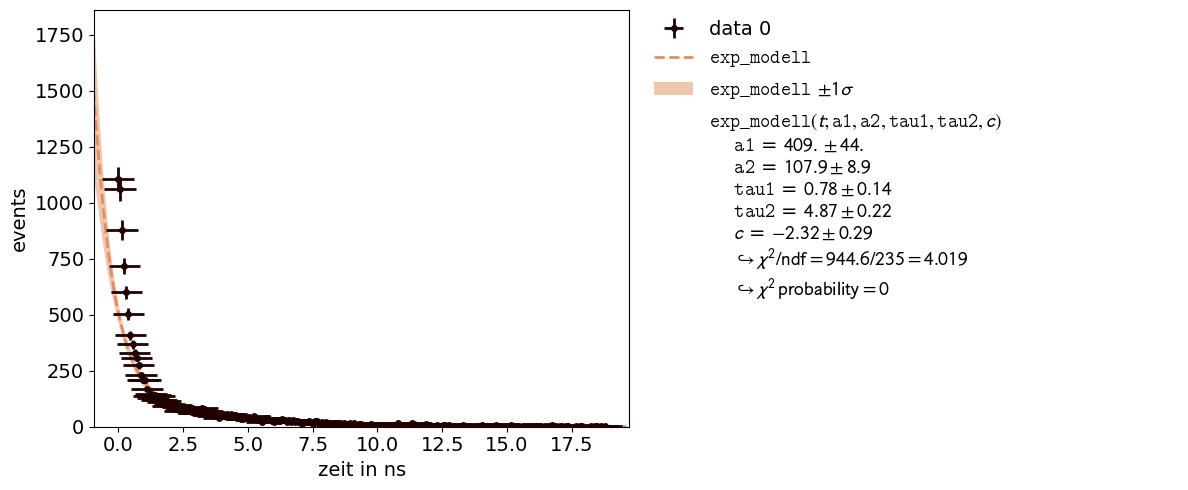

0.78+/-0.14, 4.87+/-0.22

In [19]:
def exp_modell(t, a1, a2, tau1, tau2, c = 0):
    return a1 * np.exp(-t/tau1) + a2 * np.exp(-t/tau2) + c
def exp1(t, a1, tau1, c):
    return a1 * np.exp(-t/tau1) + c

fit_lifetime = ka.XYFit(xy_data= [unumpy.nominal_values(zeiten), (A1b[start:end])], model_function= exp_modell)
plot = ka.Plot(fit_lifetime)
plot.x_label = "zeit in ns"
plot.y_label = "events"
#plot.y_scale = 'log'
fit_lifetime.add_parameter_constraint('tau1', 0.3, 1)
fit_lifetime.add_parameter_constraint('tau1', 3.5, 1)
fit_lifetime.add_error('x' , unumpy.std_devs(zeiten) + unumpy.nominal_values(np.mean(zeitauflösung)))
fit_lifetime.add_error('y', (A1b[start:end]) * 0.05)


fit_lifetime.do_fit()
plot.plot()
plt.show()

data_lifetime = fit_lifetime.get_result_dict() 
tau1 = unumpy.uarray(data_lifetime["parameter_values"]["tau1"], data_lifetime["parameter_errors"]["tau1"])
tau2 = unumpy.uarray(data_lifetime["parameter_values"]["tau2"], data_lifetime["parameter_errors"]["tau2"])
display(md(f"{tau1:.2f}, {tau2:.2f}"))

Aus dem Fit können die mittleren Lebensdauern von  $\tau_1 = 0.78\pm0.14 \, ns$ und $\tau_2 = 4.87\pm0.22 \, ns$ ablesen, wobei $\tau_1$ die gemeinsame Lebensdauer für den freien Zerfall und das Parapositronium darstellt. 

Die Literaturwerte liegen bei $\tau_{\text{para,lit}} = 0.12 \, \text{ns}, \, \tau_{\text{free,lit}} = 0.5 \, \text{ns}, \, \text{und} \, \tau_{\text{ortho,lit}} = 2 \, \text{ns} - 4 \, \text{ns}$

Für die Lebensdauer des Orthopositroniums, liegen die bestimmten Werte bei einer Abweichung von ($21.85\pm5.47$) % vom Literaturwert

# Lichgeschwindigkeit bestimmen:

Für die Bestimmung der Lichtgeschwindigkeit, werden die gemessenen Daten ebenfalls verschoben, dieses mal jedoch durch das Verschieben des Detektors um äquidistante Schritte. (von 0 dm bis 60 cm) Die $\gamma$-Quanten müssen somit einen längeren Weg zurücklegen. 
Für eine Verschiebung $\Delta x$ wird das Signal um $\Delta t$ = $\frac{\Delta x}{c}$ verschoben.

Im Folgenden werden die gemessenen Daten jeweils mit einem Gauss-Fit gefittet. Anschließend wird ein linearer Fit von den Abständen zur Quelle aufgetragen über die ermittelten Zeitabstände erstellt. 

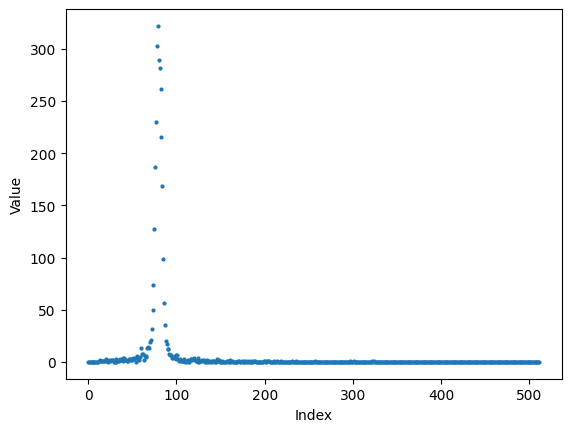

In [20]:
#### calculate light speed
d0cm = improt_data('Data/0cm.RPT')
d0cm = d0cm[~np.isnan(d0cm)]
d10cm = improt_data('Data/10cm.RPT')
d10cm = d10cm[~np.isnan(d10cm)]
d20cm = improt_data('Data/20cm.RPT')
d20cm = d20cm[~np.isnan(d20cm)]
d30cm = improt_data('Data/30cm.RPT')
d30cm = d30cm[~np.isnan(d30cm)]
d40cm = improt_data('Data/40cm.RPT')
d40cm = d40cm[~np.isnan(d40cm)]
d50cm = improt_data('Data/50cm.RPT')
d50cm = d50cm[~np.isnan(d50cm)]
d60cm = improt_data('Data/60cm.RPT')
d60cm = d60cm[~np.isnan(d60cm)]

plt.plot(d0cm, 'o', markersize=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

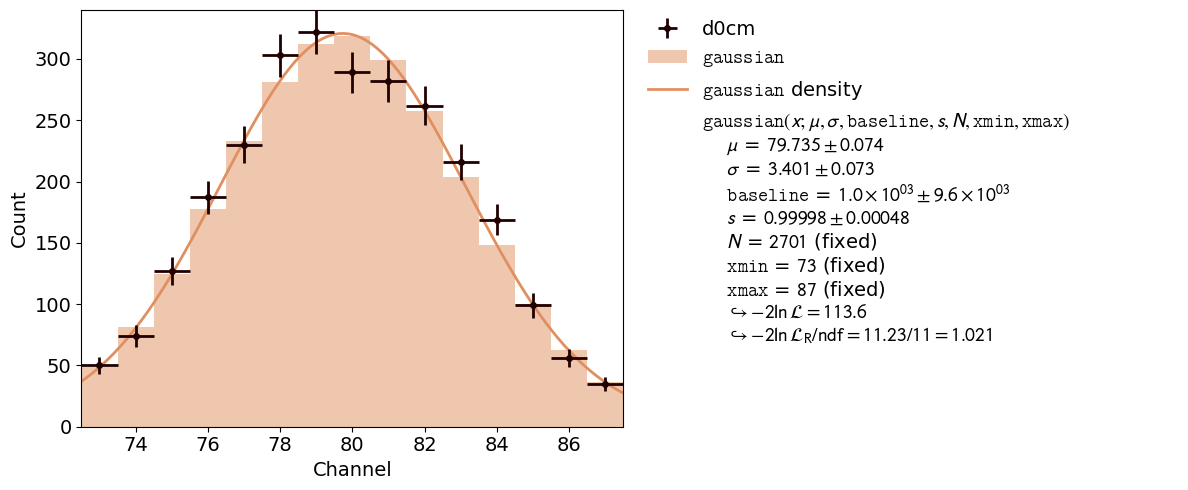

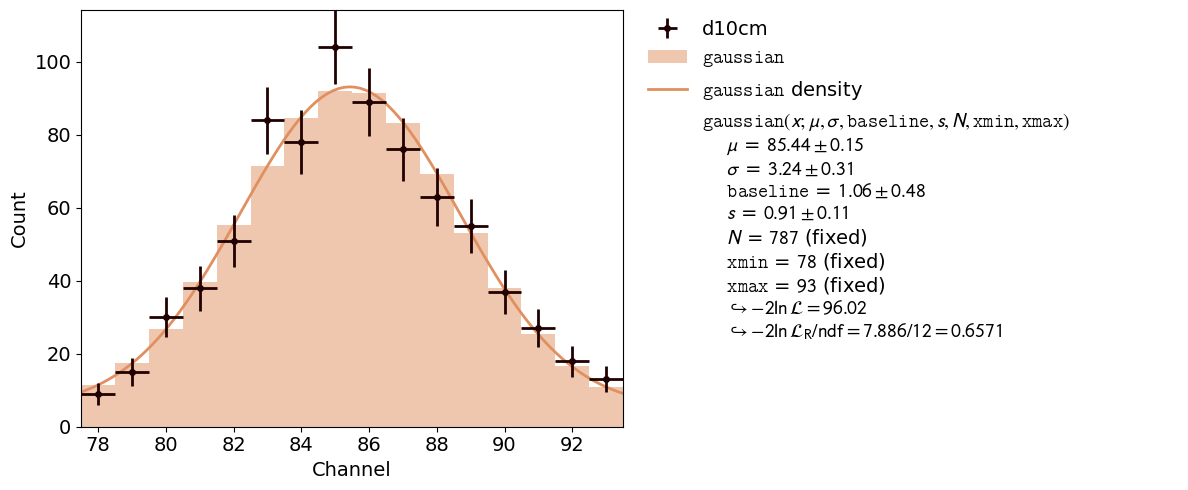

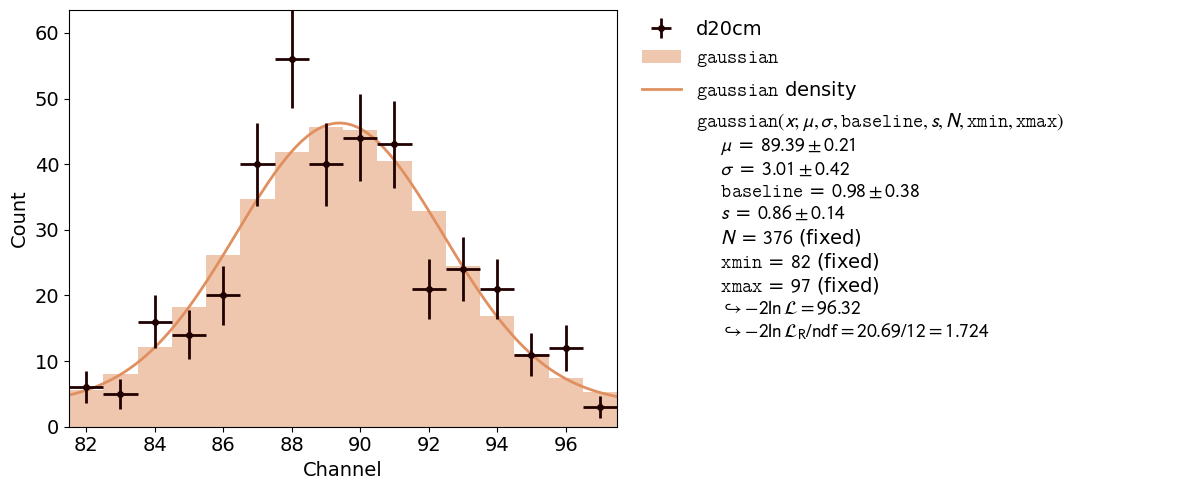

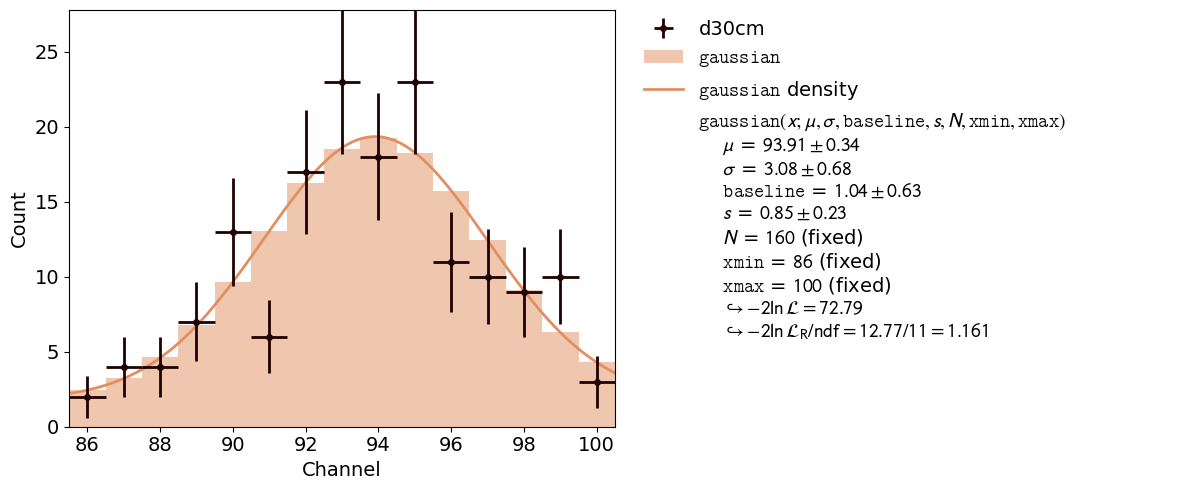

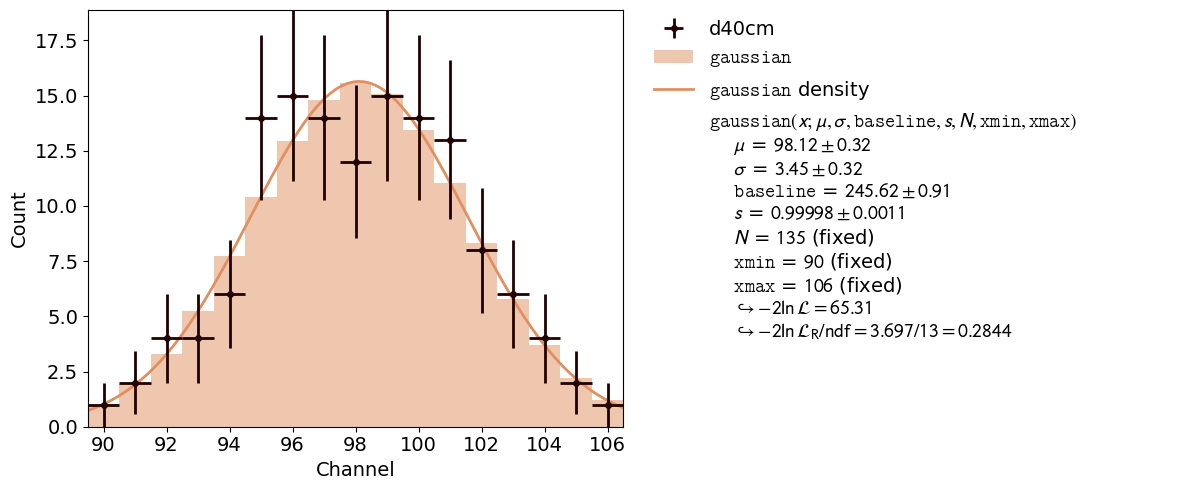

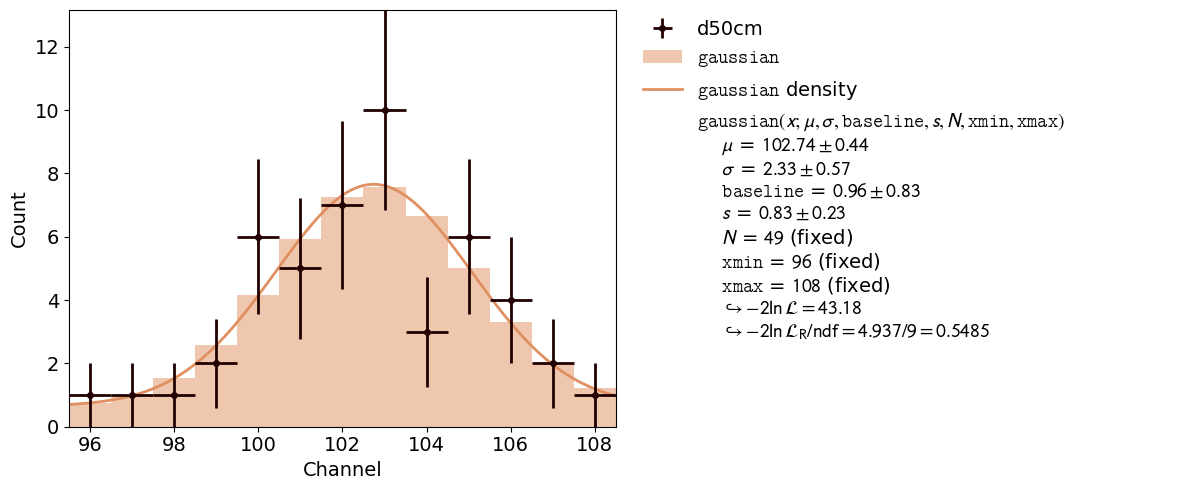

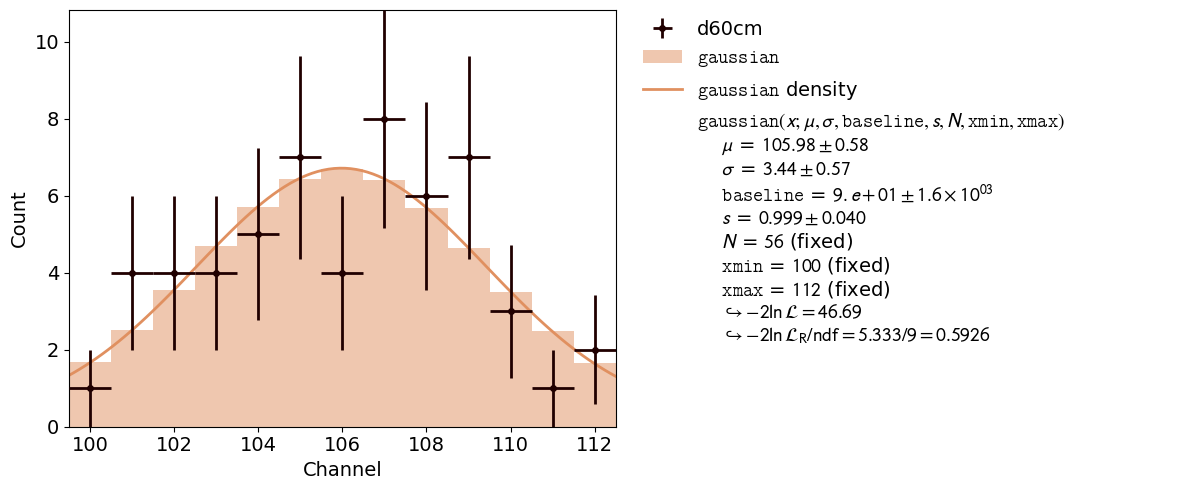

In [21]:
fit1 = fit_peak(np.arange(len(d0cm)), d0cm, 73, 87, "d0cm")
fit2 = fit_peak(np.arange(len(d10cm)), d10cm, 78, 93, "d10cm")
fit3 = fit_peak(np.arange(len(d20cm)), d20cm, 82, 97, "d20cm")
fit4 = fit_peak(np.arange(len(d30cm)), d30cm, 86, 100, "d30cm")
fit5 = fit_peak(np.arange(len(d40cm)), d40cm, 90, 106, "d40cm")
fit6 = fit_peak(np.arange(len(d50cm)), d50cm, 96, 108, "d50cm")
fit7 = fit_peak(np.arange(len(d60cm)), d60cm, 100, 112, "d60cm")


In [22]:
data =[
fit1.get_result_dict(),
fit2.get_result_dict(),
fit3.get_result_dict(),
fit4.get_result_dict(),
fit5.get_result_dict(),
fit6.get_result_dict(),
fit7.get_result_dict(),
]

mu_c = []
mu_c_err = []
sigma_c = []
sigma_c_err = []
for i in data:
    mu_c.append(i["parameter_values"]['mu'])
    sigma_c.append(i["parameter_values"]["sigma"])
    mu_c_err.append(i["parameter_errors"]["mu"])
    sigma_c_err.append(i["parameter_errors"]["sigma"])
    
mu_c_and_err = unumpy.uarray(mu_c,  np.asarray(mu_c_err) + np.asarray(sigma_c) )
sigma_c_and_err = unumpy.uarray(sigma_c, sigma_c_err)
zeiten_c = (steigung * (mu_c_and_err) ) + offset

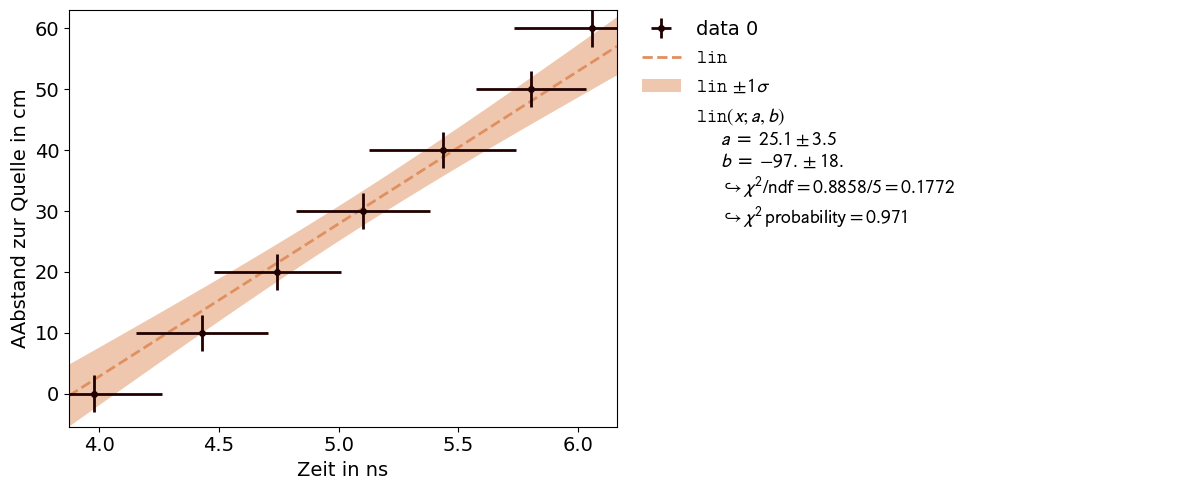

In [23]:
fit_c = ka.XYFit(xy_data= [unumpy.nominal_values(zeiten_c) , np.arange(0, 70, 10) ], model_function= lin)
plot = ka.Plot(fit_c)
plot.x_label = "Zeit in ns"
plot.y_label = "AAbstand zur Quelle in cm"

fit_c.add_error('x' , unumpy.std_devs(zeiten_c))
fit_c.add_error('y', 3)

fit_c.do_fit()
plot.plot()
plt.show()

data_c = fit_c.get_result_dict()
c = ufloat(data_c["parameter_values"]['a'], data_c["parameter_errors"]['a'])
b = ufloat(data_c["parameter_values"]['b'], data_c["parameter_errors"]['b'])

Die Verschiebung des Detektor ist nach Augenmaß geschehen, daher wurde hier ein Fehler von 3 cm geschätzt. 

Das Resultat des Fits: 
$$ s = (2.51\pm0.35) \cdot 10^8 \, \frac{m}{s} \cdot t + (-0.97\pm0.18) \,m$$

Die gemessene Lichtgeschwindigkeit ist $ s = (2.51\pm0.35) \cdot 10^8 \, \frac{m}{s}$. Dieser Wert hat vom Literaturwert eine Abweichung von $(16\pm12)$ %.